<a href="https://colab.research.google.com/github/Rajarshi452/Exploratory-Data-Analysis/blob/main/Exploratory_Data_Analysis_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author-Rajarshi Debnath**

  Problem Statement: Perform ‘Exploratory Data Analysis’ on dataset  ‘Global   Terrorism’

  As a security/defense analyst, try to find out the hot zone of terrorism.

  What all security issues and insights you can derive by EDA?

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!py -m pip install folium


/bin/bash: py: command not found


In [ ]:
import folium
from folium.plugins import MarkerCluster

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving globalterrorismdb_0718dist.csv to globalterrorismdb_0718dist (2).csv


In [ ]:
df=pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176656 entries, 0 to 176655
Columns: 135 entries, eventid to related
dtypes: float64(62), int64(15), object(58)
memory usage: 182.0+ MB


In [ ]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.766560e+05,176656.000000,176656.000000,176656.000000,176656.000000,176656.000000,176656.000000,172121.000000,1.721200e+05,176650.000000,176656.000000,176656.000000,176656.000000,176656.000000,176655.000000,27951.000000,176655.000000,176656.000000,176656.000000,176656.000000,5991.000000,411.000000,176656.000000,166741.000000,175170.000000,10616.000000,10163.000000,10302.000000,1104.000000,1026.000000,1075.000000,176275.00000,1851.000000,304.000000,176655.000000,105540.000000,107166.000000,110535.000000,17922.000000,1786.000000,590.000000,302.000000,132.000000,4813.000000,176655.000000,156519.000000,12506.000000,11017.000000,1768.000000,1606.000000,73.000000,70.000000,166610.000000,112211.000000,109846.000000,160792.000000,111957.000000,107720.000000,176655.000000,62473.000000,3.739700e+04,176477.000000,13119.00000,13064.000000,3908.000000,7826.000000,76928.000000,1.320000e+03,5.340000e+02,7.450000e+02,523.000000,10538.000000,9947.000000,176655.000000,176655.000000,176655.000000,176655.000000
mean,2.002295e+11,2002.229684,6.384051,15.480844,0.044731,132.184862,7.132523,23.461957,-4.735838e+02,1.450586,0.067747,0.988509,0.993032,0.877468,-0.544083,1.294337,0.136826,0.892214,0.035572,3.234920,3.694041,5.221411,8.429286,46.979591,127.695593,10.241805,55.276887,131.750631,9.905797,55.092593,141.233488,0.08270,0.266343,0.194079,0.002813,-64.679174,-1.556856,0.041426,7.014117,0.247480,7.176271,0.430464,6.719697,-6.335134,6.438323,11.106728,6.784583,10.724698,6.873869,11.489415,6.246575,10.842857,2.401380,0.047830,0.498034,3.185513,0.040015,0.101253,-0.524361,3.298593,2.174537e+05,0.059804,4.73001,-0.366427,-45.102546,-31.595451,-0.146111,3.241977e+06,6.099025e+05,7.438171e+05,253.707457,4.623363,-28.762642,-4.556831,-4.479494,0.090640,-3.953905
std,1.321956e+09,13.220354,3.387628,8.815785,0.206713,112.490793,2.941322,18.687151,2.077403e+05,0.999168,0.284587,0.106580,0.083185,0.327900,2.486449,0.700102,0.343665,0.310111,0.185221,1.903311,2.259101,2.248496,6.654029,31.007193,88.747761,5.716725,25.690677,126.134510,5.778332,26.638285,154.983427,0.27543,0.442165,0.396142,0.052967,221.416698,12.990767,1.113501,2.515655,0.996524,2.815693,0.495963,2.916953,4.212863,2.162848,6.501156,2.250020,7.572082,2.165333,8.418024,1.507212,8.192672,11.543354,5.807859,4.232794,36.353260,3.124272,1.446742,3.106268,0.488897,1.585155e+07,0.448969,205.49009,6.952816,83.763062,122.763748,1.207790,3.054965e+07,7.266604e+06,1.033881e+07,3020.995954,2.039194,65.631973,4.543373,4.635264,0.574923,4.691794
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.00000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.00000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000

In [ ]:
df.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,-0.024732,0.015763,0.091948,-0.137060,0.402131,0.168954,0.003894,0.030520,0.070707,0.001857,0.026104,-0.011284,0.295123,0.045396,0.093882,-0.077056,0.138231,0.069594,0.063935,0.186032,0.079820,0.050503,-0.019691,0.101059,0.115190,-0.082349,0.143869,0.077640,0.021509,0.046761,-0.067753,-0.184014,0.016061,-0.136993,0.438604,0.137865,0.111767,0.034596,0.039761,-0.301666,-0.149381,0.385651,-0.016803,0.102984,0.095200,0.039302,0.070498,0.079274,-0.138596,0.027110,0.015655,-0.013761,0.026318,0.016138,-0.029562,0.026165,-0.282004,-0.147264,-0.013235,-0.008880,0.007469,-0.012085,-0.486459,-0.166613,-0.248271,-0.007087,-0.014089,-0.011930,-0.165293,0.262533,-0.185500,-0.151373,-0.141166,-0.078184,-0.183036
iyear,0.999996,1.000000,-0.027305,0.015683,0.091941,-0.137038,0.402137,0.168995,0.003904,0.030506,0.070720,0.001833,0.026101,-0.011289,0.295154,0.045412,0.093894,-0.077060,0.138226,0.069581,0.064204,0.186238,0.079822,0.050497,-0.019674,0.100972,0.115113,-0.082303,0.143670,0.077473,0.021440,0.046756,-0.067713,-0.183729,0.016070,-0.137040,0.438400,0.137755,0.111717,0.034820,0.039943,-0.302564,-0.148795,0.385161,-0.016817,0.102974,0.095212,0.039277,0.070496,0.079567,-0.138298,0.026855,0.015645,-0.013780,0.026305,0.016127,-0.029567,0.026150,-0.281991,-0.147282,-0.013227,-0.008900,0.007438,-0.012092,-0.486422,-0.166694,-0.248035,-0.007084,-0.014325,-0.012080,-0.165228,0.262495,-0.185432,-0.151358,-0.141151,-0.078175,-0.183011
imonth,-0.024732,-0.027305,1.000000,0.004112,-0.003215,-0.004650,-0.011259,-0.017904,-0.004001,0.002630,-0.006795,0.001264,0.000859,0.004424,-0.020038,-0.010150,-0.005544,0.004821,-0.001032,0.002334,-0.044935,-0.048151,-0.003189,0.001085,-0.004944,0.019388,0.015076,-0.004828,0.042672,0.038045,0.016735,-0.000351,-0.008007,-0.051320,-0.003845,0.017597,0.018016,0.017305,0.011382,-0.042828,-0.043340,0.180840,-0.161378,0.136424,0.005206,0.001068,-0.011526,0.003448,-0.028902,-0.097666,-0.062079,0.058090,0.003387,0.004267,0.001886,0.003409,0.001851,0.002311,0.001368,0.005845,-0.002850,0.006293,0.012236,0.002270,0.000718,0.009263,-0.070485,0.001425,0.052639,0.062491,-0.012881,0.008996,-0.009211,-0.004126,-0.004154,-0.001821,-0.007284
iday,0.015763,0.015683,0.004112,1.000000,-0.004046,0.003961,0.009558,0.002825,-0.002324,-0.007940,-0.005403,0.012189,-0.002926,-0.004431,0.001551,-0.007438,-0.003372,-0.010706,0.003541,-0.007342,0.019920,-0.091157,-0.000435,-0.003028,0.004148,0.015088,0.018108,-0.017591,-0.056151,-0.043599,-0.035311,-0.001632,0.041869,-0.039273,-0.004716,-0.013495,0.002799,0.003653,0.001293,-0.033928,0.029741,0.160527,0.103801,0.028002,-0.004059,0.005954,0.019731,-0.001698,0.037629,-0.027125,-0.005110,0.073744,-0.003851,-0.001979,-0.001936,-0.000979,0.001572,0.001862,-0.004081,-0.012197,-0.001080,0.004913,-0.020776,-0.002358,-0.038272,0.018891,0.000982,0.013371,-0.010341,0.003632,-0.006343,-0.005096,0.002539,-0.001713,-0.001791,-0.001823,-0.001078
extended,0.091948,0.091941,-0.003215,-0.004046,1.000000,-0.020997,0.037500,-0.024076,0.000527,0.056998,0.016999,-0.015724,0.001667,0.048292,0.011315,0.094436,-0.013961,0.071945,-0.033279,0.272386,-0.026217,-0.048035,0.010872,0.021388,0.014526,-0.032693,-0.015321,0.036202,0.046977,0.048699,0.012964,0.034452,-0.051712,-0.0

In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

***US Terror Attacks and Death Injuries.***


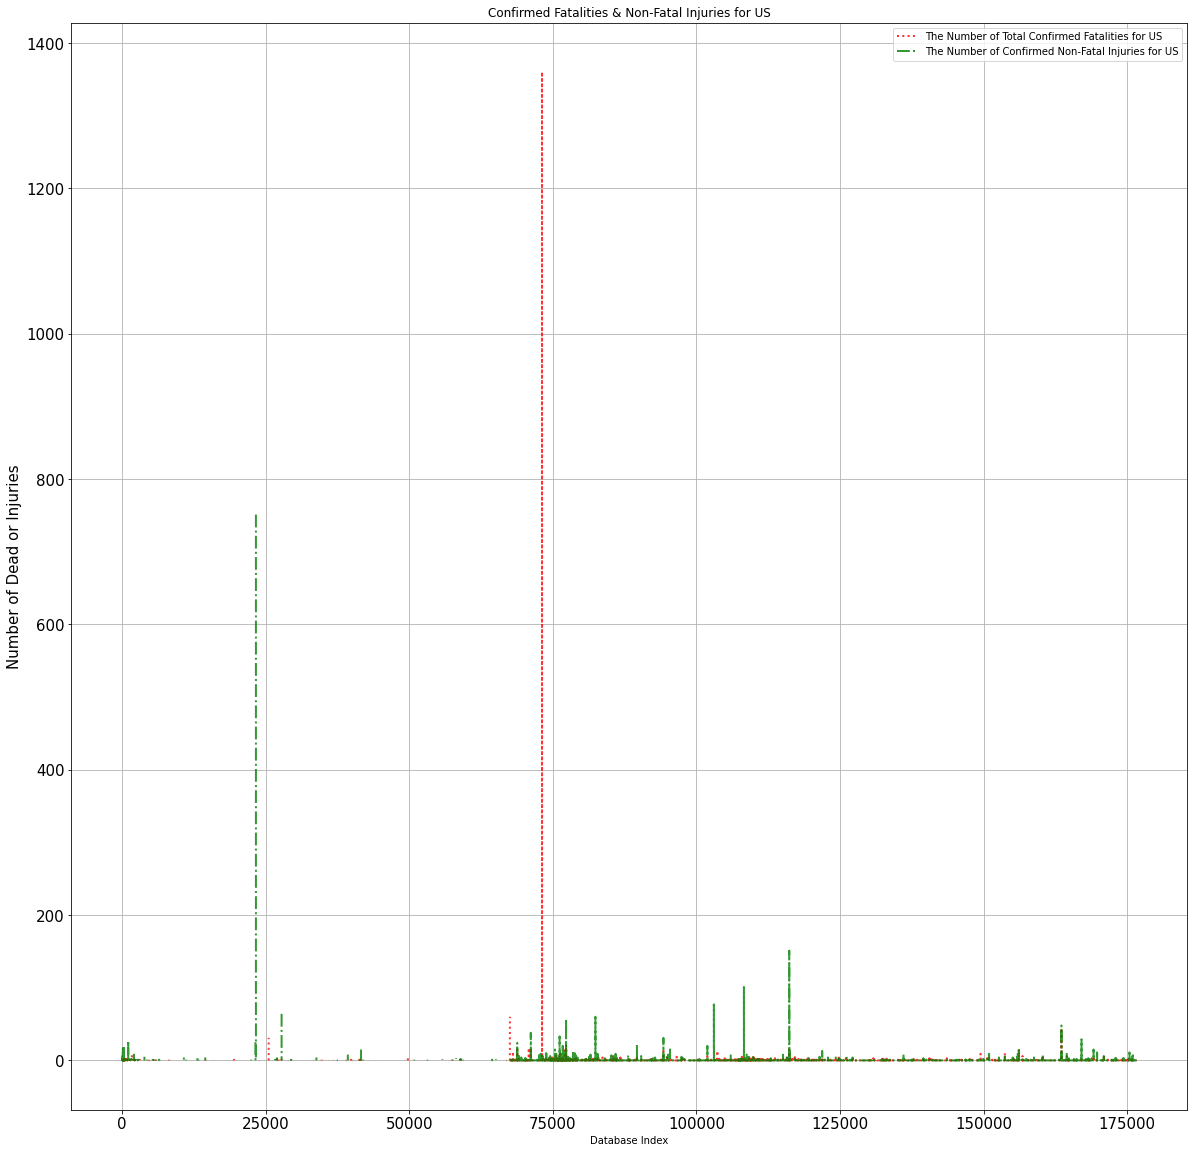

In [ ]:
df.nkillus.plot(kind = 'line', color = 'red', label = 'The Number of Total Confirmed Fatalities for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
df.nwoundus.plot(color = "green", label = 'The Number of Confirmed Non-Fatal Injuries for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=10)              # label = name of label
plt.ylabel('Number of Dead or Injuries', fontsize=15)

plt.title('Confirmed Fatalities & Non-Fatal Injuries for US')            #plot title
plt.show()

***Death and Injuries at all time.***

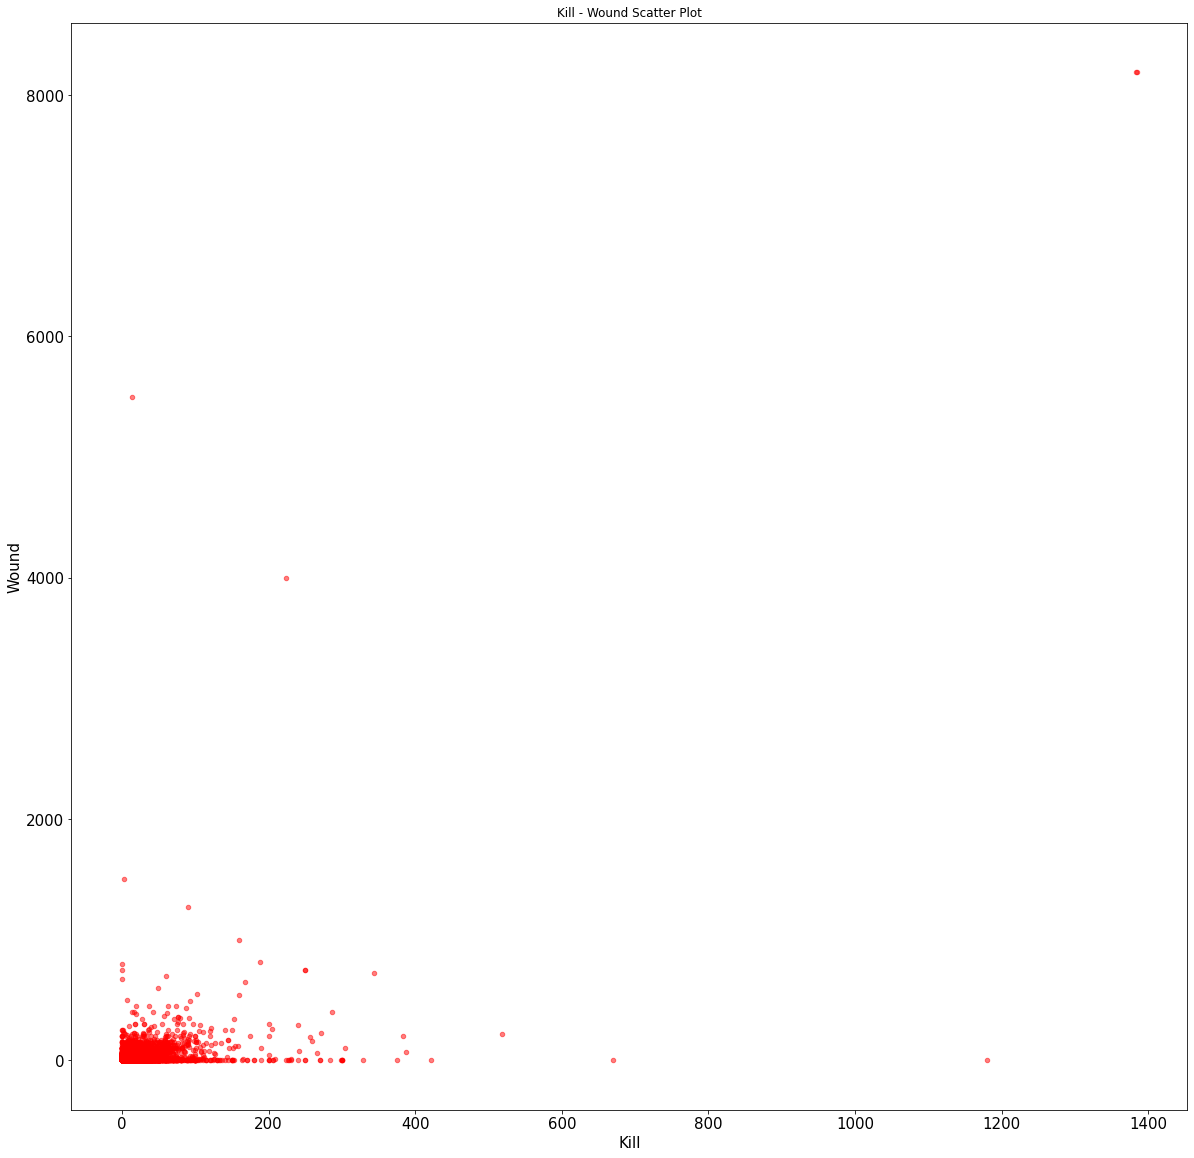

In [ ]:
df.plot(kind = 'scatter', x = 'nkill', y = 'nwound', alpha = 0.5, color = 'red', figsize = (20,20), fontsize=15)
plt.xlabel('Kill', fontsize=15)
plt.ylabel('Wound', fontsize=15)
plt.title('Kill - Wound Scatter Plot')
plt.show()

***Frequency of Terrorist Actions in Customized Region***

Let's analyze in Middle East and North Africa

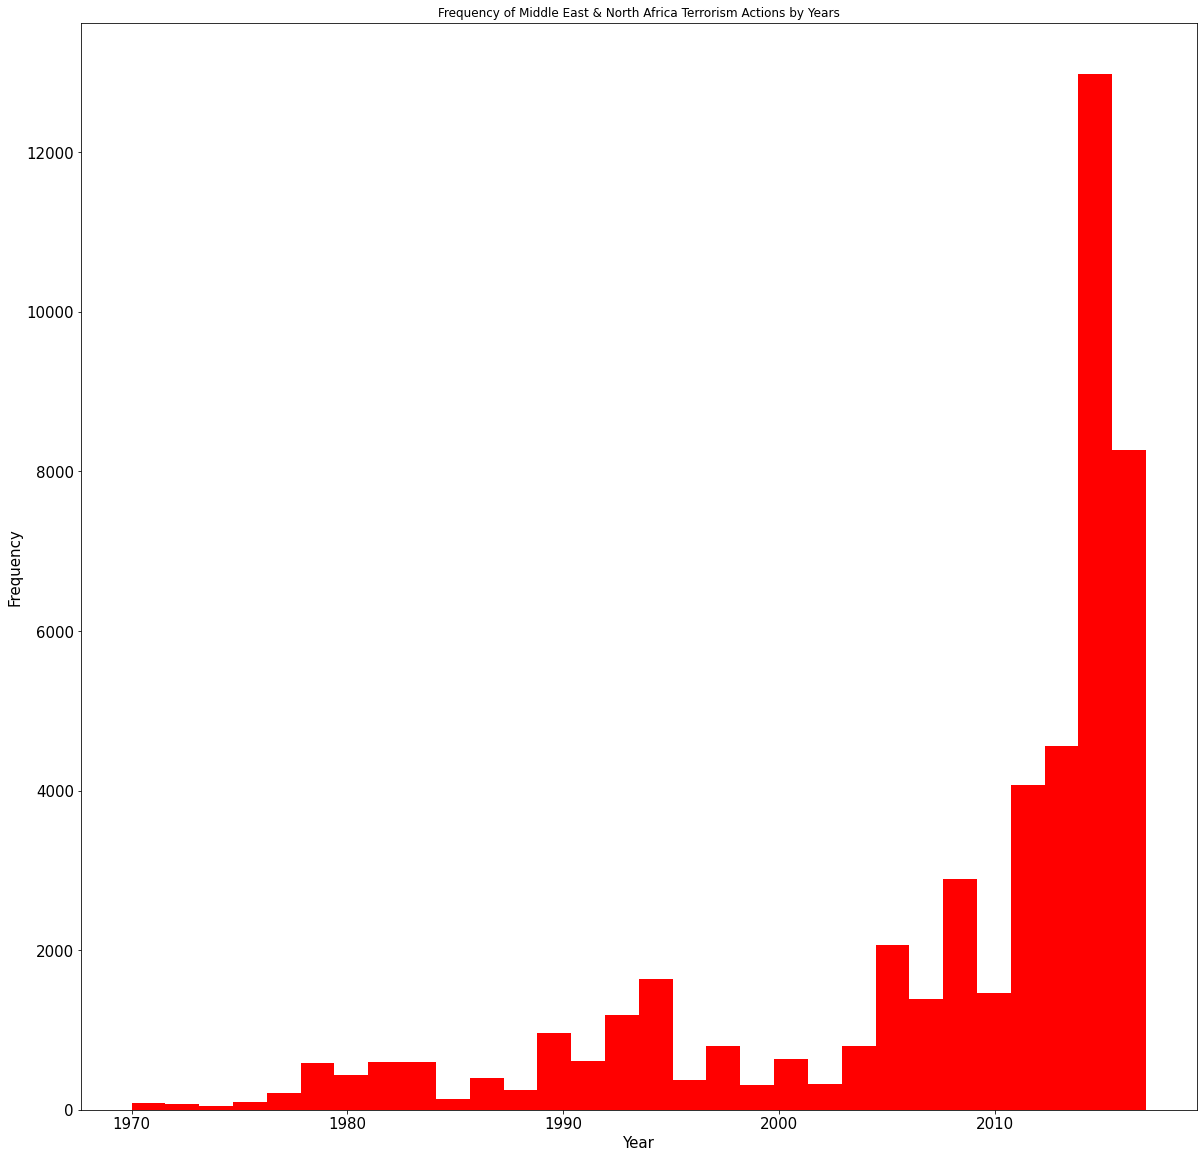

In [ ]:
middleEastData = df[df['region'] == 10]
middleEastData.iyear.plot(kind = 'hist', bins = 30, figsize = (20,20), color = 'red', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Frequency of Middle East & North Africa Terrorism Actions by Years')
plt.show()


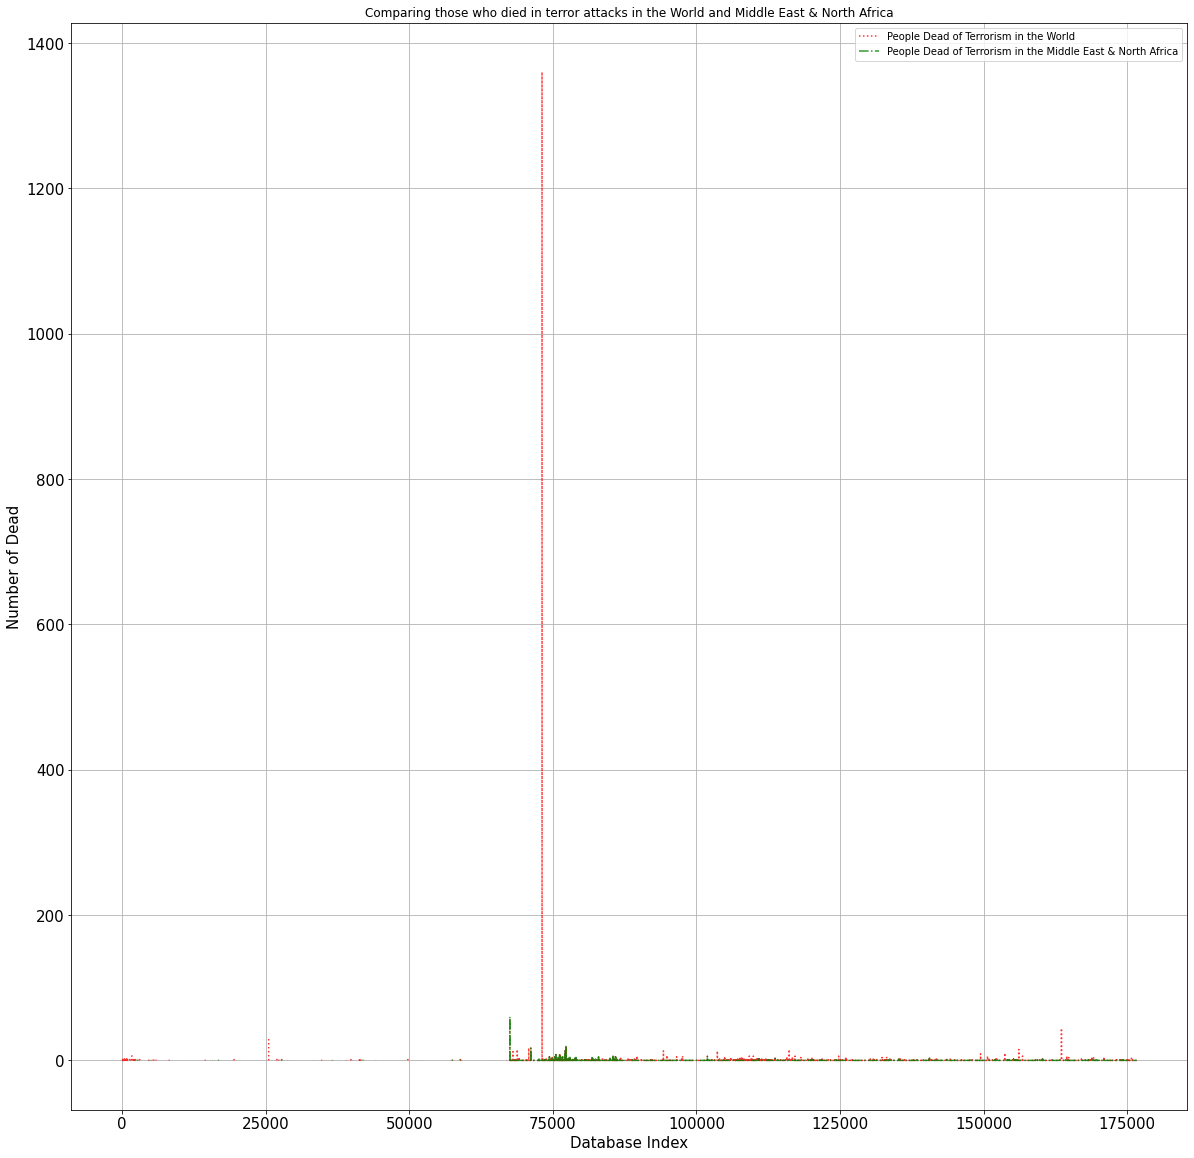

In [ ]:
df.nkillus.plot(kind = 'line', color = 'red', label = 'People Dead of Terrorism in the World', linewidth = 1.5, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
middleEastData.nkillus.plot(color = "green", label = 'People Dead of Terrorism in the Middle East & North Africa', linewidth = 1.5, alpha = 0.8, 
                            grid = True, linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=15)              # label = name of label
plt.ylabel('Number of Dead', fontsize=15)

plt.title('Comparing those who died in terror attacks in the World and Middle East & North Africa')            #plot title
plt.show()

***Terrorist Attacks of a Particular year and their Locations.***

Let's look at the terrorist acts in the world over a certain year.

In [ ]:
filterYear = df['iyear'] == 1970

In [ ]:
filterData = df[filterYear] # filter data information
reqFilterData = filterData.loc[:,'city':'longitude'] # Required fileds are obtained
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()

In [ ]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]], popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

In [ ]:
killData = df.loc[:,'nkill']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))

Number of people killed by terror attack: 400094


In [ ]:
attackData = df.loc[:,'attacktype1':'attacktype1_txt']
typeKillData = pd.concat([attackData, killData], axis=1)

In [ ]:
typeKillFormatData = typeKillData.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
typeKillFormatData

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,157334.0,24512.0,151996.0,3595.0,3710.0,4372.0,23291.0,846.0,30438.0


In [ ]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Armed Assault                        1 non-null      float64
 1   Assassination                        1 non-null      float64
 2   Bombing/Explosion                    1 non-null      float64
 3   Facility/Infrastructure Attack       1 non-null      float64
 4   Hijacking                            1 non-null      float64
 5   Hostage Taking (Barricade Incident)  1 non-null      float64
 6   Hostage Taking (Kidnapping)          1 non-null      float64
 7   Unarmed Assault                      1 non-null      float64
 8   Unknown                              1 non-null      float64
dtypes: float64(9)
memory usage: 80.0+ bytes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


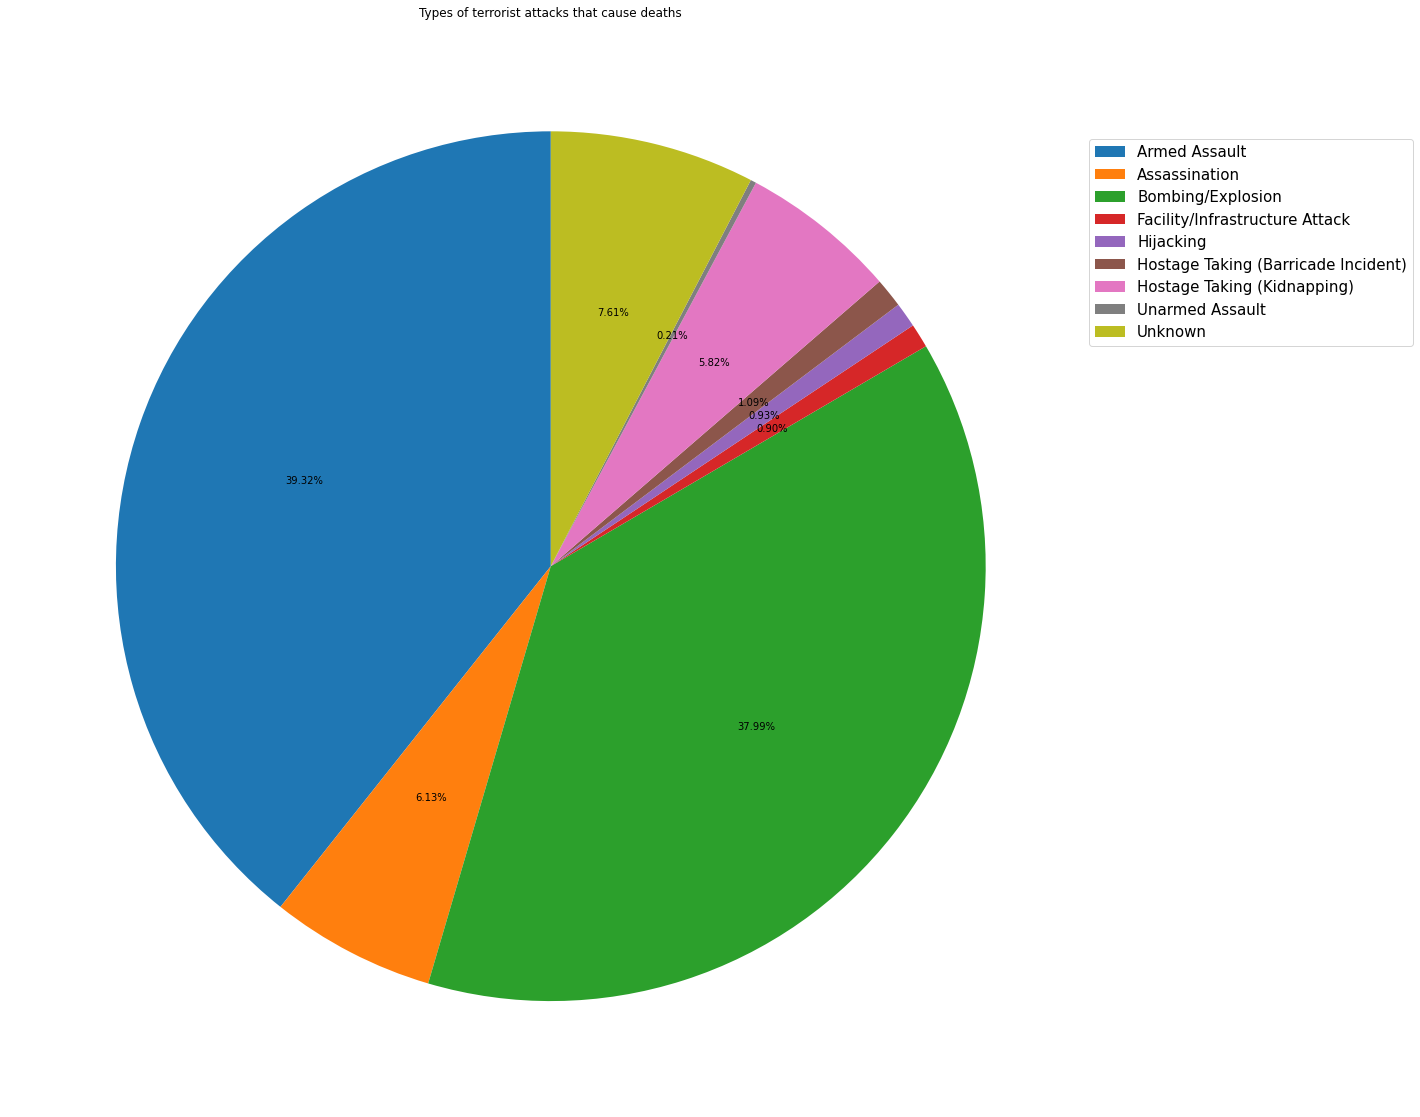

In [ ]:
labels = typeKillFormatData.columns.tolist() 
transpoze = typeKillFormatData.T # transpoze
values = transpoze.values.tolist()
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.3, 0.9), fontsize=15) # location legend
plt.show()

***Number of Killed in Terrorist Attacks by Countries.***

In [ ]:
countryData = df.loc[:,'country':'country_txt']
countryKillData = pd.concat([countryData, killData], axis=1)

In [ ]:
countryKillFormatData = countryKillData.pivot_table(columns='country_txt', values='nkill', aggfunc='sum')
countryKillFormatData

country_txt,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia-Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Costa Rica,Croatia,Cuba,...,Soviet Union,Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
nkill,36164.0,42.0,11059.0,0.0,3043.0,0.0,490.0,37.0,22.0,30.0,258.0,1.0,43.0,1243.0,76.0,14.0,78.0,3.0,0.0,9.0,42.0,79.0,11.0,203.0,0.0,28.0,90.0,4192.0,543.0,2211.0,365.0,1897.0,1106.0,228.0,1008.0,14650.0,1.0,17.0,248.0,8.0,...,96.0,1267.0,15529.0,0.0,2.0,3846.0,29.0,6.0,22.0,74.0,14254.0,60.0,307.0,73.0,2720.0,76.0,6.0,350.0,6795.0,3.0,3062.0,2252.0,123.0,3410.0,3694.0,6.0,68.0,0.0,0.0,223.0,1.0,0.0,1477.0,97.0,1.0,8361.0,119.0,324.0,70.0,154.0


In [ ]:
countryKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Columns: 205 entries, Afghanistan to Zimbabwe
dtypes: float64(205)
memory usage: 1.6+ KB


In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

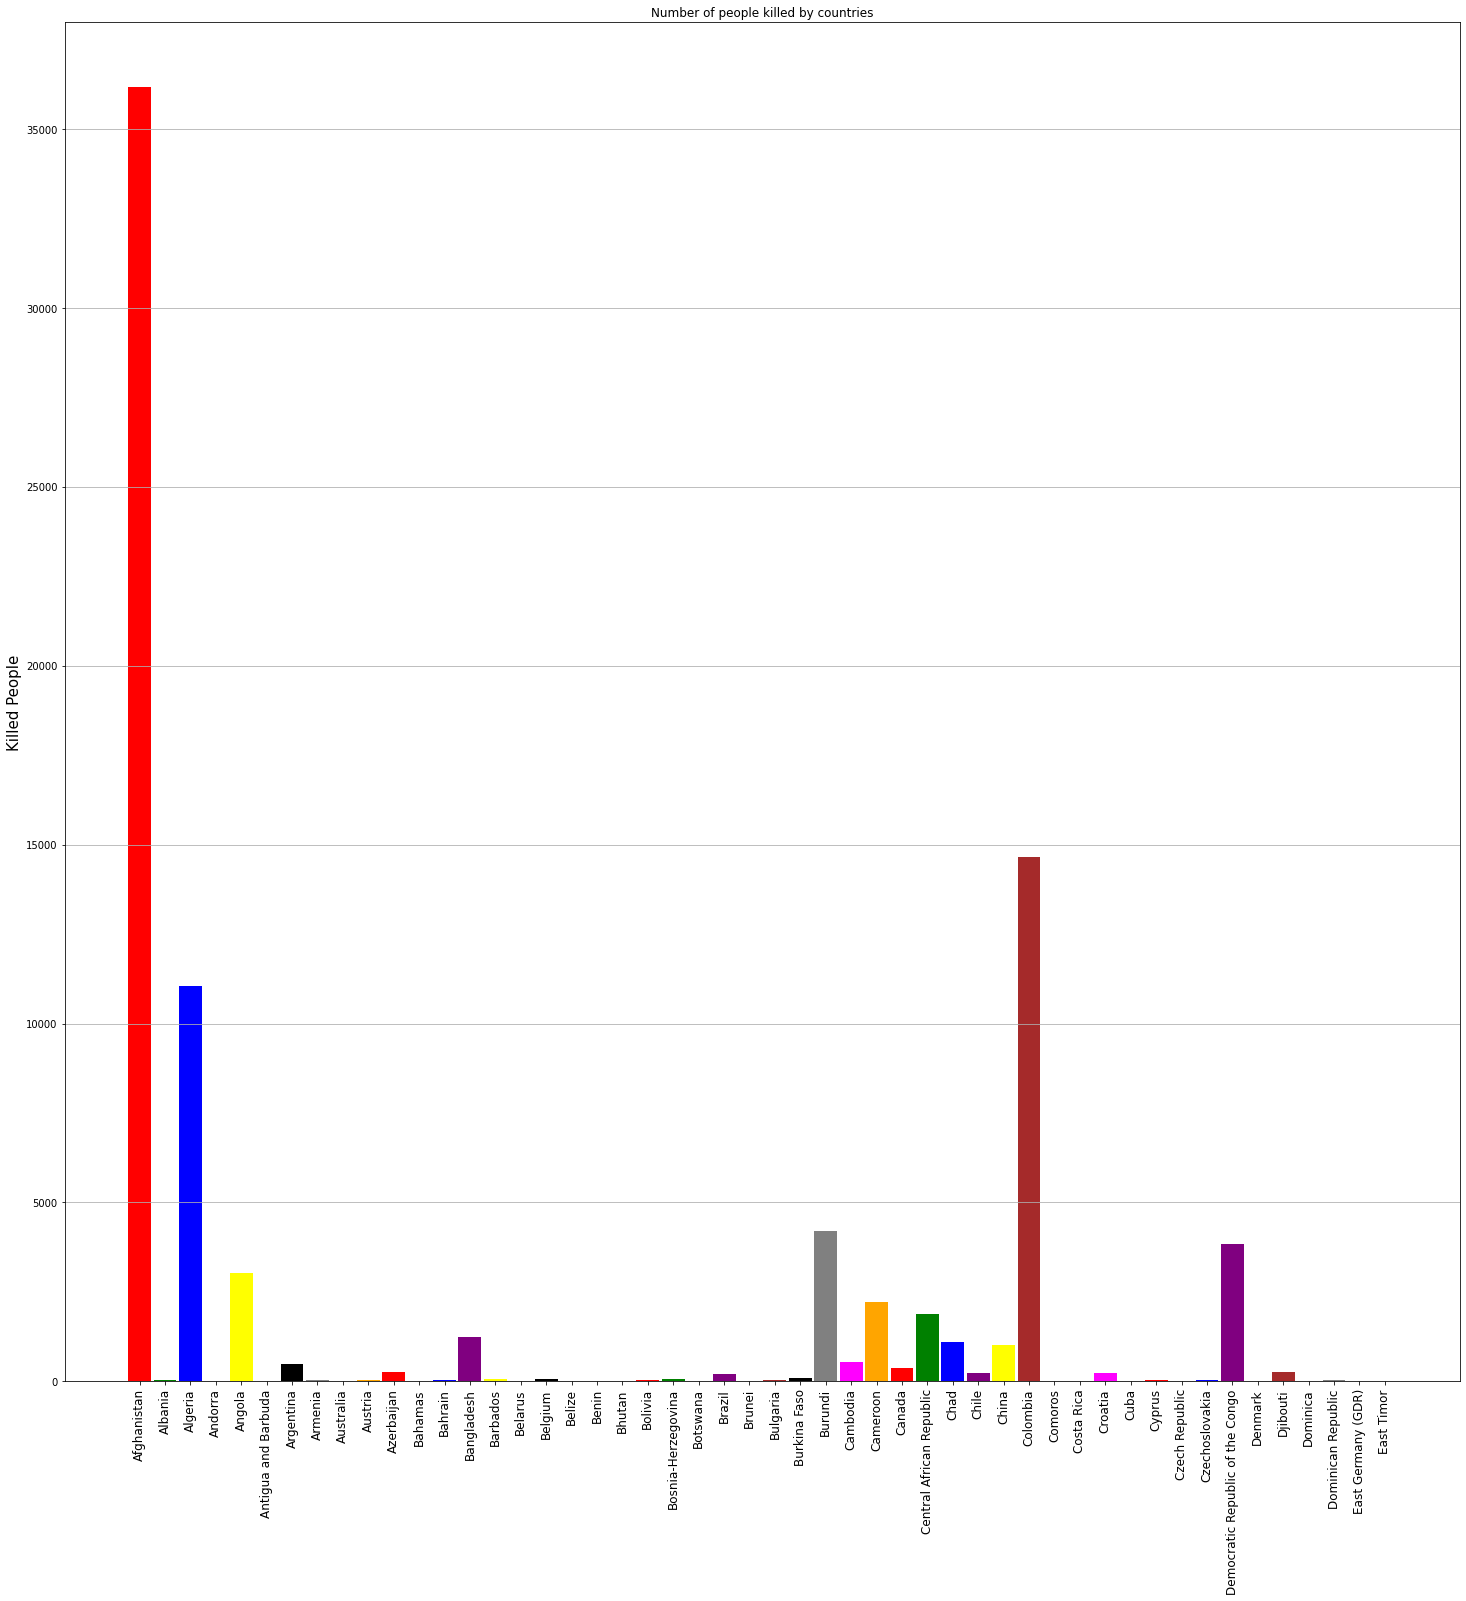

In [ ]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
# print(fig_size)
plt.show()

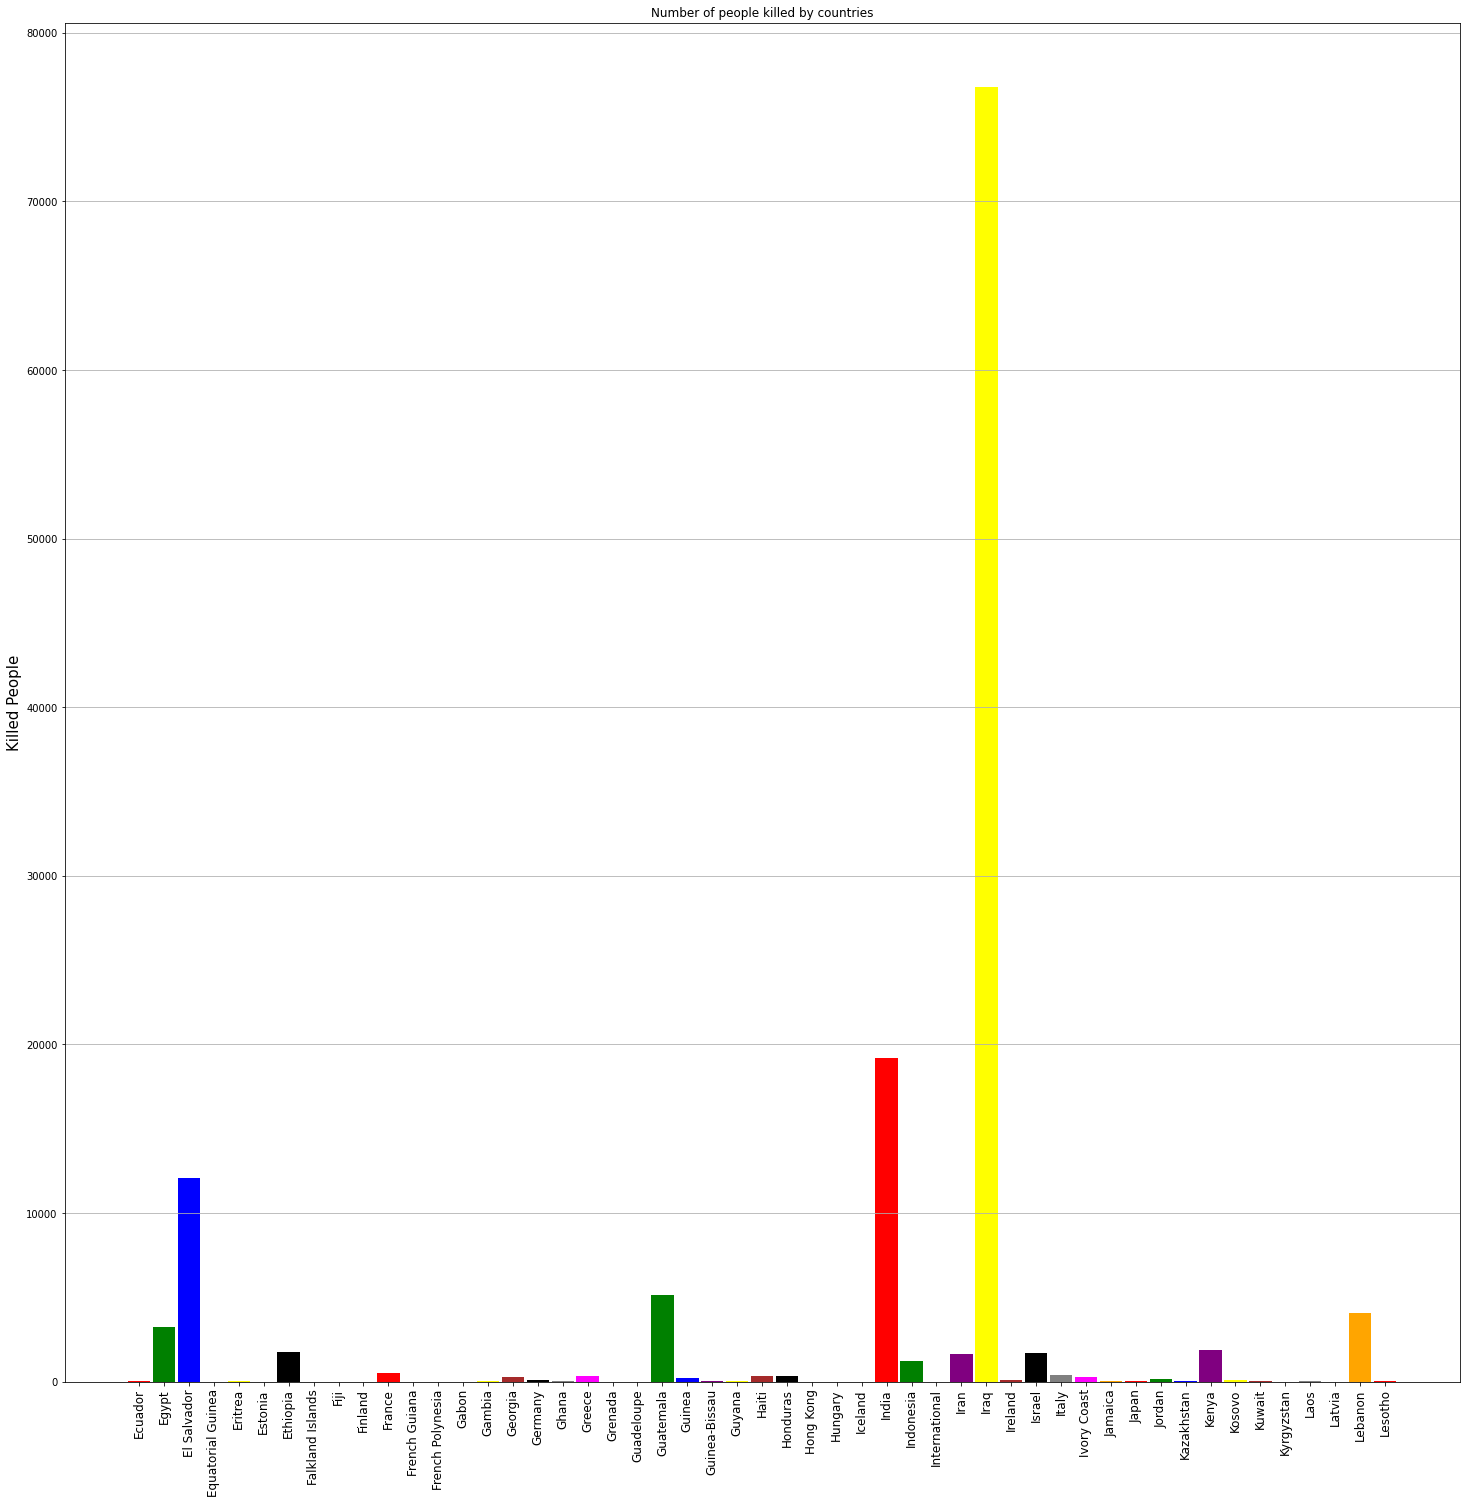

In [ ]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()

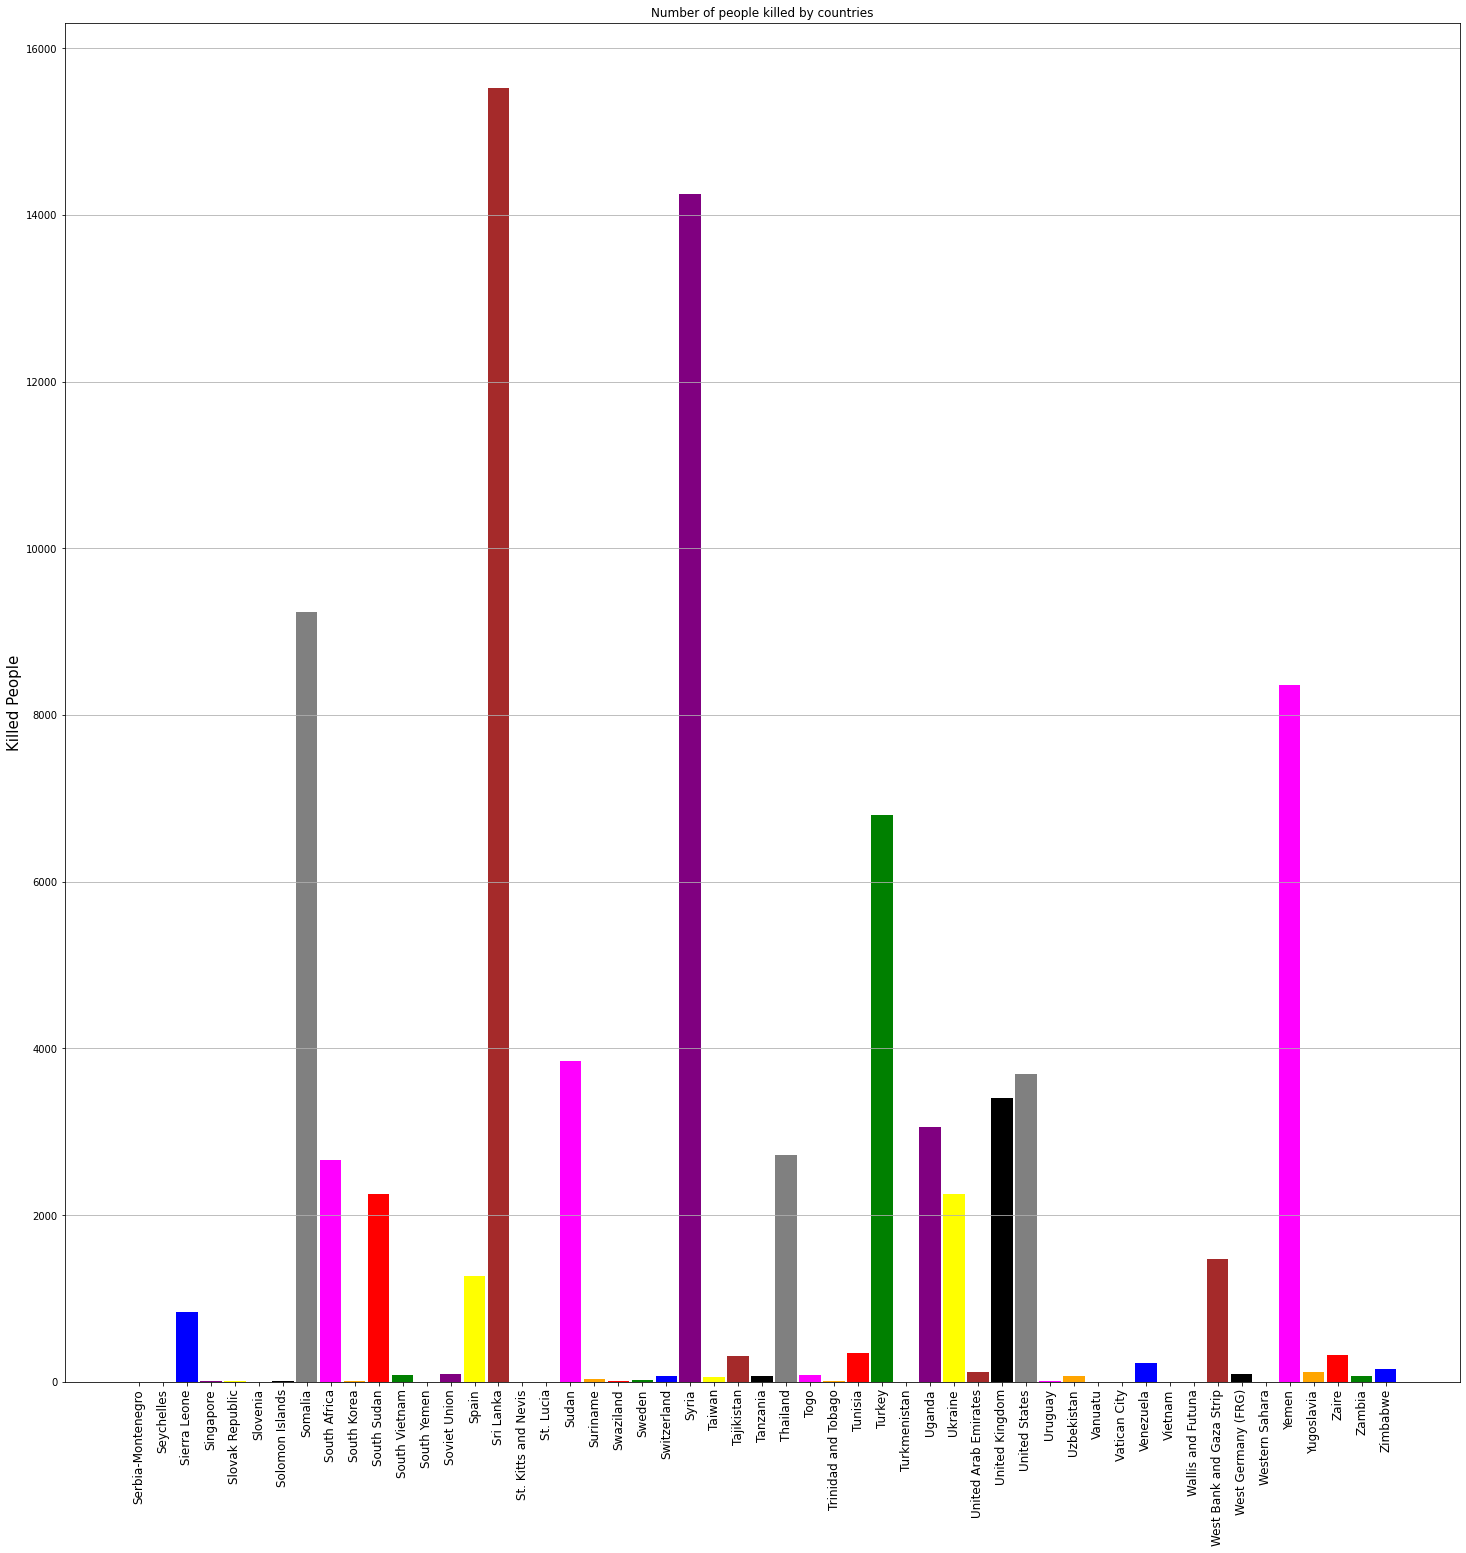

In [ ]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()

Terrorist acts in the Middle East and northern Africa have been seen to have fatal consequences. The Middle East and North Africa are seen to be the places of serious terrorist attacks.Some of the muslim countries have also been affected because of such horrific events,here in the graphical display we can say Iraq,Pakistan and Afghanistan had been the most sufferers around the globe.
